In [382]:
 # Importing needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [383]:
data=pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')#Locading dataset

##Performing EDA on Dataset

In [384]:
data.shape

(13320, 9)

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [386]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [387]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [388]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Data visualisation

<ipython-input-389-152cdd42ef2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


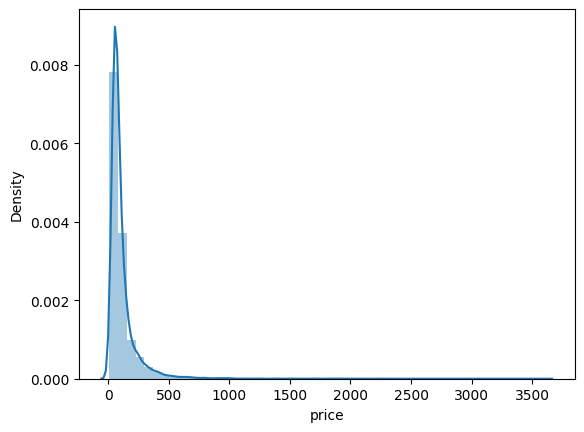

In [389]:
sns.distplot(data['price'])
plt.show()

<Axes: ylabel='price'>

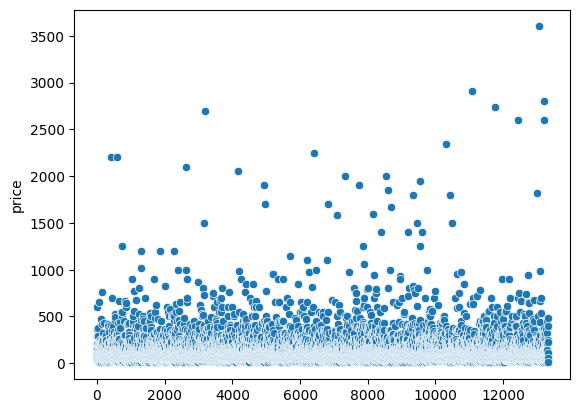

In [390]:
sns.scatterplot(data['price'])

<ipython-input-391-e40283d675ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bath'])


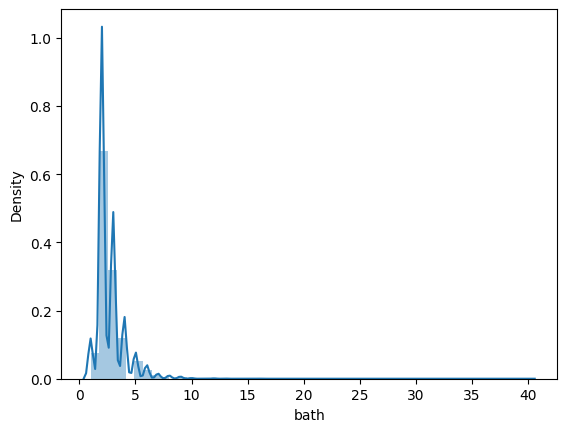

In [391]:
sns.distplot(data['bath'])
plt.show()

<Axes: ylabel='bath'>

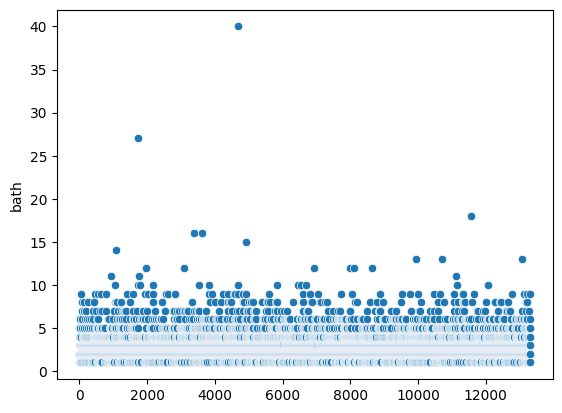

In [392]:
sns.scatterplot(data['bath'])

<ipython-input-393-ecb826ceb771>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['balcony'])


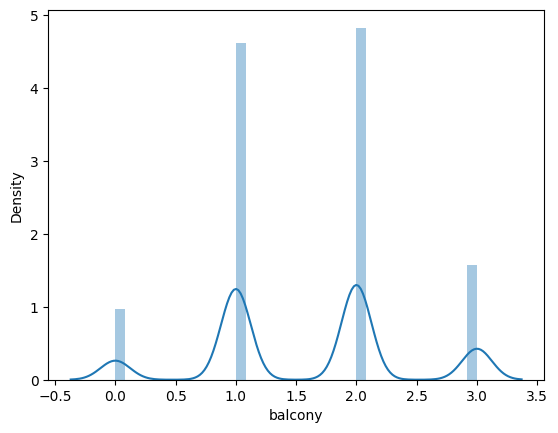

In [393]:
sns.distplot(data['balcony'])
plt.show()

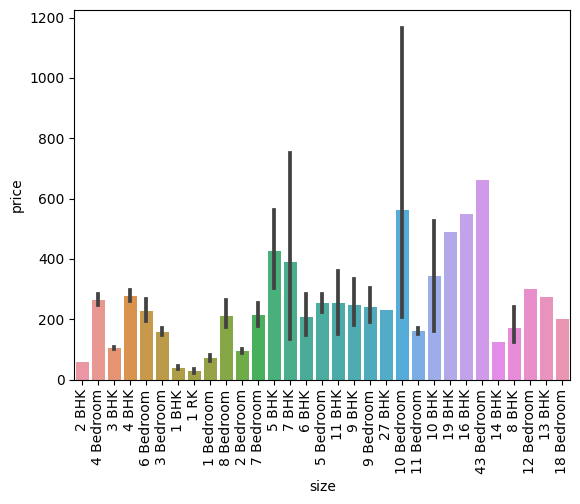

In [394]:
sns.barplot(x=data['size'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

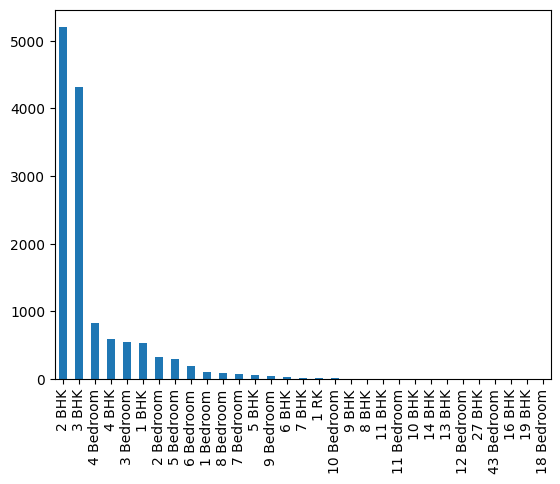

In [395]:
data['size'].value_counts().plot(kind='bar')

In [ ]:
variables=data.keys()

In [ ]:
corr_matrix=data[variables].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix,cmap="BuPu", annot=True,ax=ax)
plt.show()

In [396]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Preprocessing

In [397]:
data.drop(columns=['balcony','area_type','availability','society'],inplace=True)

In [398]:
data.shape

(13320, 5)

In [399]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [400]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [401]:
for i in data.columns:
  print(data[i].value_counts())
  print('+'*20)

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
++++++++++++++++++++
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Be

In [402]:
data.corr()['price']

<ipython-input-402-8d819dfdca41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


bath     0.456345
price    1.000000
Name: price, dtype: float64

##Handling Missing Values

In [405]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [406]:
data['location']=data['location'].fillna('Kothanur')

In [407]:
data.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [408]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [409]:
data['size']=data['size'].fillna('2 BHK')

In [410]:
data.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [411]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [412]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


## Feature Engineering & Transformation

In [414]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [415]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [416]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [417]:
def convert_range(x):
  temp=x.split('_')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [418]:
data['total_sqft']=data['total_sqft'].apply(convert_range)

In [419]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [420]:
data['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [421]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [422]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [423]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [424]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [425]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [426]:
data['location']=data['location'].apply(lambda x : x.strip())
location_counts=data['location'].value_counts()

In [427]:
location_counts

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [428]:
location_count_less_10=location_counts[location_counts<=10]
location_count_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [429]:
data['location']=data['location'].apply(lambda x:'others' if x in location_count_less_10 else x)

In [430]:
data['location'].value_counts()

others                2885
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [431]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [432]:
(data['total_sqft']/data['bhk']).describe()

count    13073.000000
mean       573.254923
std        389.887823
min          0.250000
25%        472.000000
50%        551.000000
75%        625.000000
max      26136.000000
dtype: float64

In [433]:
data=data[((data['total_sqft']/data['bhk'])>=300)]

In [434]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,1590.166773,2.561441,111.444236,2.651472,6322.476758
std,1261.827604,1.072551,152.759322,0.973754,4187.479096
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1118.000000,2.000000,49.340000,2.000000,4207.119741
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.483548
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [435]:
data.shape

(12329, 7)

In [436]:
data.price_per_sqft.describe()

count     12329.000000
mean       6322.476758
std        4187.479096
min         267.829813
25%        4207.119741
50%        5300.000000
75%        6938.483548
max      176470.588235
Name: price_per_sqft, dtype: float64

In [437]:
from re import sub
def remove_outlier_sqft(df):
  df_output=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_output=pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
data=remove_outlier_sqft(data)
data.describe()



,total_sqft,bath,price,bhk,price_per_sqft
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,1502.755034,2.472129,91.120414,2.573666,5670.431136
std,873.959398,0.972214,86.251507,0.893601,2276.089730
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4242.424242
50%,1283.500000,2.000000,67.000000,2.000000,5184.504357
75%,1650.000000,3.000000,100.000000,3.000000,6451.612903
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [438]:
def bhk_outlier_remover(df):
  exclude_indices=np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
          }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')


In [439]:
data=bhk_outlier_remover(data)

In [440]:
data.shape

(7228, 7)

In [441]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10145,others,2 BHK,1200.0,2.0,70.0,2,5833.333333
10146,others,1 BHK,1800.0,1.0,200.0,1,11111.111111
10149,others,2 BHK,1353.0,2.0,110.0,2,8130.081301
10150,others,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [442]:
data.drop(columns=['size','price_per_sqft'],inplace=True)


In [443]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<ipython-input-444-4d52b34f6f90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_sqft'])


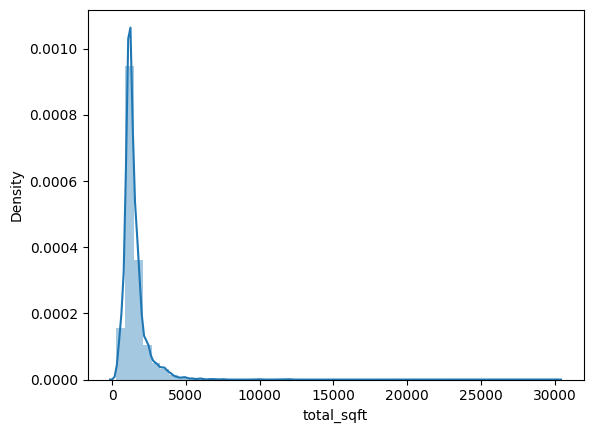

In [444]:
sns.distplot(data['total_sqft'])
plt.show()

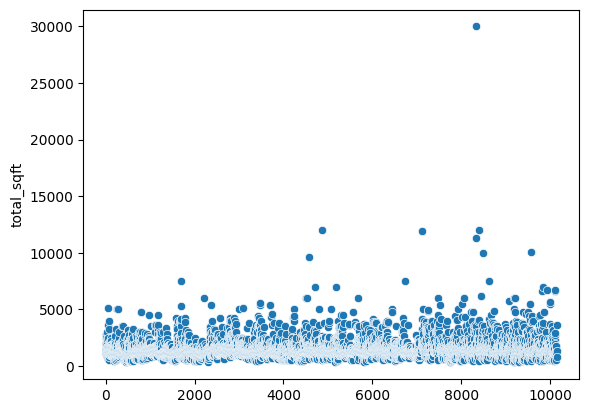

In [445]:
sns.scatterplot(data['total_sqft'])
plt.show()

<ipython-input-446-e40283d675ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bath'])


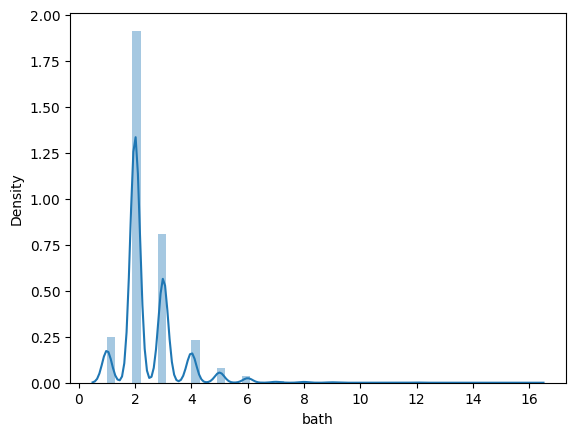

In [446]:
sns.distplot(data['bath'])
plt.show()

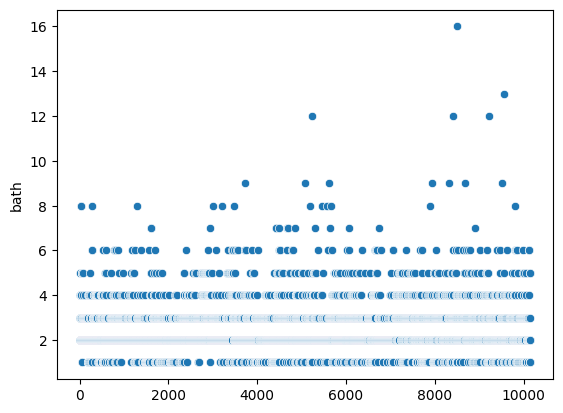

In [447]:
sns.scatterplot(data['bath'])
plt.show()

<ipython-input-448-cbde0f38381c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bhk'])


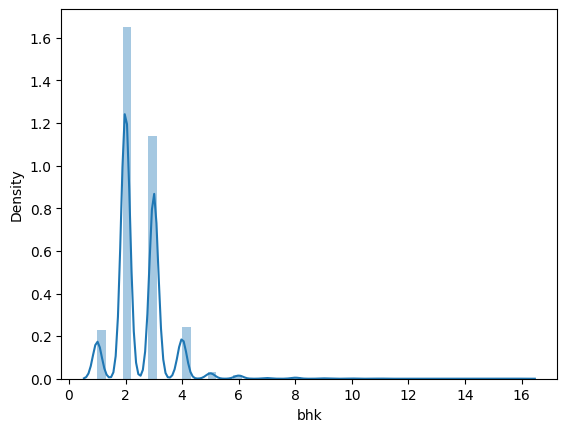

In [448]:
sns.distplot(data['bhk'])
plt.show()

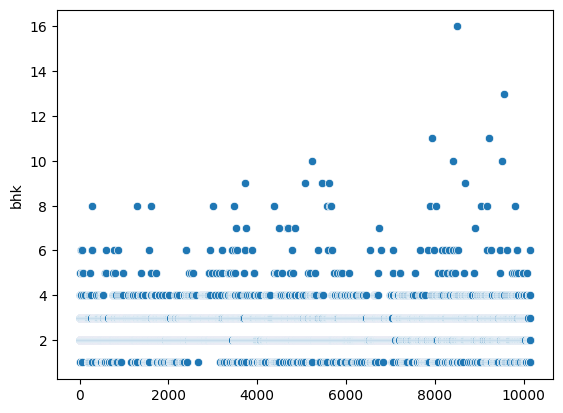

In [449]:
sns.scatterplot(data['bhk'])
plt.show()

In [451]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


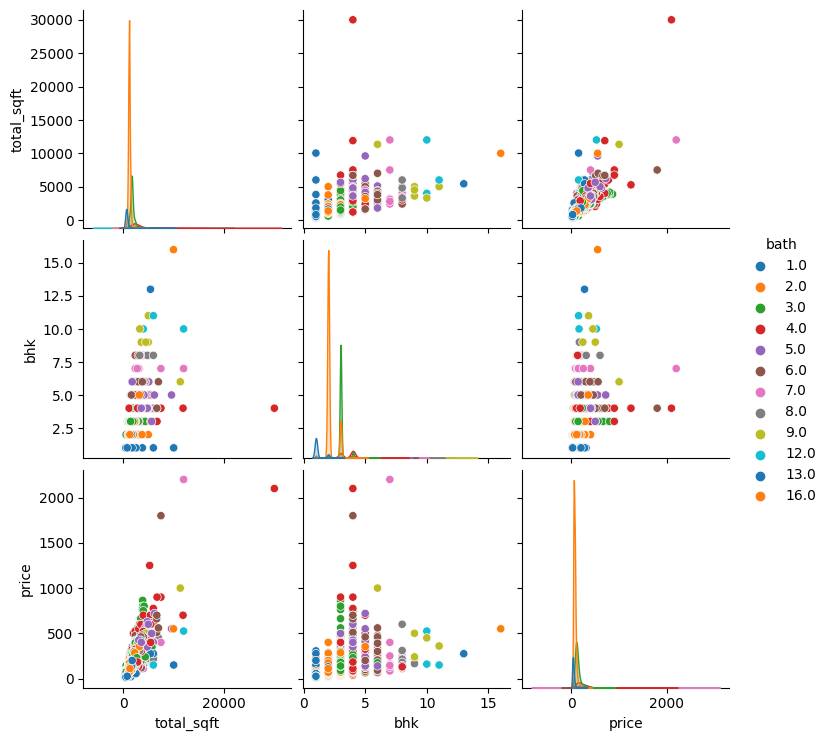

In [453]:
sns.pairplot(data=data,
             vars=['total_sqft','bhk','price'],
             hue='bath',palette='tab10')
plt.show()

##Model Implementation

In [454]:
x=data.drop(columns=['price'])
y=data['price']

In [455]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [456]:
print(x_train.shape)
print(x_test.shape)

(5782, 4)
(1446, 4)


In [457]:
columns_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [458]:
scaler=StandardScaler()
lr=LinearRegression()
pipe=make_pipeline(columns_trans,scaler,lr)

##LinearRegression

In [459]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [460]:
y_pred_lr=pipe.predict(x_test)

In [463]:
r2_score(y_test,y_pred_lr)

0.8144826826906628

In [464]:
mse = mean_squared_error(y_test, y_pred_lr)
mse

1276.6296418023169

##Lasso

In [124]:
lasso=Lasso()

In [125]:
pipe=make_pipeline(columns_trans,scaler,lasso)
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [126]:
y_pred_lassoo=pipe.predict(x_test)


In [127]:
r2 = r2_score(y_test, y_pred_lassoo)
print(r2)

0.8007966052596576


In [128]:
mse = mean_squared_error(y_test, y_pred_lassoo)
mse

1370.8098098956789

##Ridge

In [129]:
ridge=Ridge()

In [130]:
pipe=make_pipeline(columns_trans,scaler,ridge)

In [131]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [132]:
y_pred_ridge=pipe.predict(x_test)

In [133]:
r2=r2_score(y_test,y_pred_ridge)
print(r2)

0.8142440134933633


In [134]:
mse = mean_squared_error(y_test, y_pred_ridge)
mse

1278.2720338780368

## Assumptions of Regression

In [466]:
residual = y_test - y_pred_lr

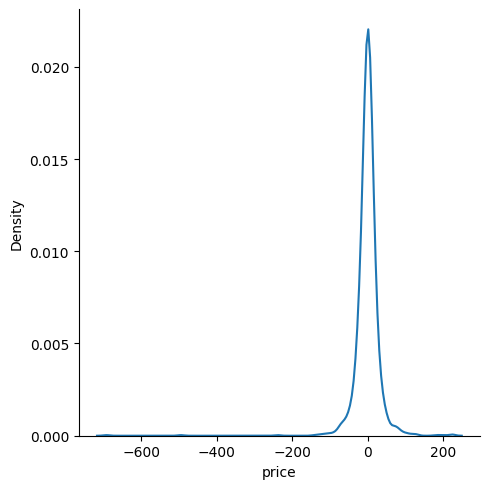

In [467]:
sns.displot(residual,kind='kde')

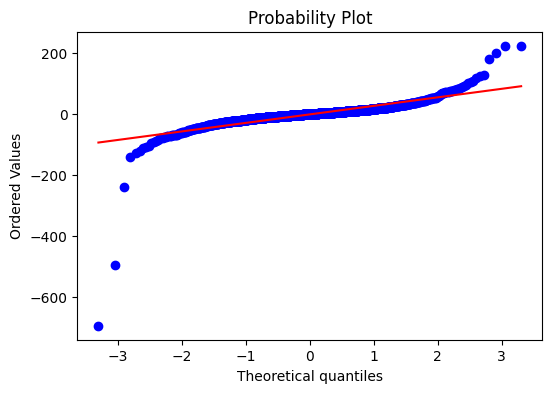

In [468]:
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()